In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp



In [2]:
# Importing from mediapipe
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [66]:
# Run and check the camera using opencv
cap = cv2.VideoCapture(0)
# Instantiating our model with the following settings (passed as parameters)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    while cap.isOpened():
        # Read the feed
        ret, frame = cap.read()
        # Use mediapipe to detect co-ordinates
        image, results = mediapipe_detection(frame, holistic)
        # Draw the co-ordinates
        draw_styled_landmarks(image, results)
        
        # Show the feed
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [65]:
rh_landmarks = []
for res in results.right_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    rh_landmarks.append(test)
len(rh_landmarks) # array of numpy arrays

21

In [62]:
all_landmarks = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    all_landmarks.append(test)
len(all_landmarks) # array of numpy arrays

33

In [63]:
all_landmarks

[array([ 0.52648598,  0.71989214, -0.83249682,  0.99989235]),
 array([ 0.5488435 ,  0.64871854, -0.78722841,  0.99975139]),
 array([ 0.56331933,  0.64623433, -0.78717852,  0.99980021]),
 array([ 0.57829481,  0.64447838, -0.78731847,  0.99971509]),
 array([ 0.4961296 ,  0.65092057, -0.79871082,  0.99978703]),
 array([ 0.47789311,  0.65089113, -0.7979005 ,  0.99984115]),
 array([ 0.46100265,  0.65113729, -0.79810083,  0.99980521]),
 array([ 0.6054281 ,  0.66011924, -0.43724722,  0.99975657]),
 array([ 0.43601975,  0.67310071, -0.47529069,  0.99989218]),
 array([ 0.55941212,  0.78265101, -0.69291466,  0.99987078]),
 array([ 0.49560222,  0.79056627, -0.7034359 ,  0.99990863]),
 array([ 0.74898601,  0.96075445, -0.1735644 ,  0.998564  ]),
 array([ 0.30488983,  0.98320496, -0.34173816,  0.99931914]),
 array([ 0.84798622,  1.29237187, -0.11435344,  0.07868689]),
 array([ 0.22624981,  1.36212993, -0.32566968,  0.3097325 ]),
 array([ 0.84070569,  1.58045423, -0.41960749,  0.02377569]),
 array([

In [43]:
draw_landmarks(frame, results)

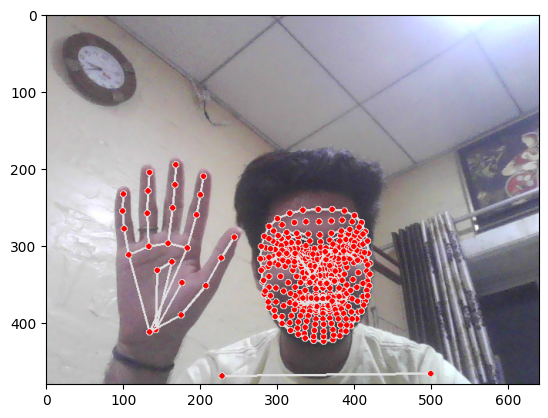

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [77]:
extract_keypoints(results).shape

(1662,)

Setup folders for our training data that will be collected through webcam

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['loud', 'happy', 'quiet', 'beautiful', 'blind', 'deaf', 'sad','ugly'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [9]:
# This will create 30 folders for each of the actions(words) 
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
# To record with camera
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results) # keypoints has numpy array of size (1662,)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints) # saves numpy array in given path with extension .npy
                # can load this array using np.load(path)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [10]:
# To take input from videos
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
                               
            cap = cv2.VideoCapture(os.path.join("C:\\Users\\Naresh\\OneDrive\\Desktop\\dataset\\Adjectives", action, str(sequence))+".MOV")
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                               
                

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results) # keypoints has numpy array of size (1662,)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)) + ".npy"
                np.save(npy_path, keypoints) # saves numpy array in given path with extension .npy
                # can load this array using np.load(path)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'loud': 0,
 'happy': 1,
 'quiet': 2,
 'beautiful': 3,
 'blind': 4,
 'deaf': 5,
 'sad': 6,
 'ugly': 7}

In [10]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:


np.array(sequences).shape



(240, 30, 1662)

In [16]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [17]:
np.array(labels).shape

(240,)

In [18]:
X = np.array(sequences)
X.shape

(240, 30, 1662)

In [19]:
y = to_categorical(labels).astype(int)
y


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [25]:
y.shape

(90, 3)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [21]:
X_train.shape

(204, 30, 1662)

In [22]:
X_test.shape

(36, 30, 1662)

In [23]:
y_train.shape


(204, 8)

In [22]:
y_test.shape

(36, 8)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



In [23]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
7/7 [==============================] - 6s 104ms/step - loss: 2.1212 - categorical_accuracy: 0.1176
Epoch 2/1000
7/7 [==============================] - 1s 131ms/step - loss: 2.1582 - categorical_accuracy: 0.1225
Epoch 3/1000
7/7 [==============================] - 1s 77ms/step - loss: 2.0854 - categorical_accuracy: 0.1029
Epoch 4/1000
7/7 [==============================] - 1s 82ms/step - loss: 2.0780 - categorical_accuracy: 0.1275
Epoch 5/1000
7/7 [==============================] - 1s 77ms/step - loss: 2.0742 - categorical_accuracy: 0.1520
Epoch 6/1000
7/7 [==============================] - 1s 90ms/step - loss: 2.0483 - categorical_accuracy: 0.2647
Epoch 7/1000
7/7 [==============================] - 1s 95ms/step - loss: 2.0598 - categorical_accuracy: 0.1716
Epoch 8/1000
7/7 [==============================] - 1s 149ms/step - loss: 2.0499 - categorical_accuracy: 0.1814
Epoch 9/1000
7/7 [==============================] - 1s 82ms/step - loss: 2.0703 - categorical_accuracy: 0.191

7/7 [==============================] - 1s 114ms/step - loss: 1.4395 - categorical_accuracy: 0.2892
Epoch 74/1000
7/7 [==============================] - 1s 96ms/step - loss: 1.4949 - categorical_accuracy: 0.3186
Epoch 75/1000
7/7 [==============================] - 1s 171ms/step - loss: 1.4993 - categorical_accuracy: 0.3039
Epoch 76/1000
7/7 [==============================] - 1s 74ms/step - loss: 1.6746 - categorical_accuracy: 0.2598
Epoch 77/1000
7/7 [==============================] - 1s 73ms/step - loss: 2.3778 - categorical_accuracy: 0.1569
Epoch 78/1000
7/7 [==============================] - 1s 171ms/step - loss: 1.9309 - categorical_accuracy: 0.2157
Epoch 79/1000
7/7 [==============================] - 1s 108ms/step - loss: 1.9574 - categorical_accuracy: 0.1814
Epoch 80/1000
7/7 [==============================] - 1s 85ms/step - loss: 1.9513 - categorical_accuracy: 0.1814
Epoch 81/1000
7/7 [==============================] - 1s 82ms/step - loss: 1.9331 - categorical_accuracy: 0.1814
Ep

7/7 [==============================] - 1s 75ms/step - loss: 1.4033 - categorical_accuracy: 0.3627
Epoch 146/1000
7/7 [==============================] - 1s 91ms/step - loss: 1.3981 - categorical_accuracy: 0.3284
Epoch 147/1000
7/7 [==============================] - 1s 79ms/step - loss: 1.3970 - categorical_accuracy: 0.3382
Epoch 148/1000
7/7 [==============================] - 1s 161ms/step - loss: 1.4150 - categorical_accuracy: 0.3480
Epoch 149/1000
7/7 [==============================] - 1s 120ms/step - loss: 1.4063 - categorical_accuracy: 0.3186
Epoch 150/1000
7/7 [==============================] - 1s 73ms/step - loss: 1.4082 - categorical_accuracy: 0.3137
Epoch 151/1000
7/7 [==============================] - 1s 116ms/step - loss: 1.4066 - categorical_accuracy: 0.3186
Epoch 152/1000
7/7 [==============================] - 1s 87ms/step - loss: 1.4038 - categorical_accuracy: 0.3039
Epoch 153/1000
7/7 [==============================] - 1s 71ms/step - loss: 1.3905 - categorical_accuracy: 0.

7/7 [==============================] - 1s 109ms/step - loss: 1.0470 - categorical_accuracy: 0.5098
Epoch 218/1000
7/7 [==============================] - 1s 169ms/step - loss: 1.1208 - categorical_accuracy: 0.4951
Epoch 219/1000
7/7 [==============================] - 1s 104ms/step - loss: 1.1181 - categorical_accuracy: 0.5245
Epoch 220/1000
7/7 [==============================] - 1s 107ms/step - loss: 1.1786 - categorical_accuracy: 0.4559
Epoch 221/1000
7/7 [==============================] - 1s 73ms/step - loss: 1.0752 - categorical_accuracy: 0.5245
Epoch 222/1000
7/7 [==============================] - 0s 69ms/step - loss: 1.0664 - categorical_accuracy: 0.4951
Epoch 223/1000
7/7 [==============================] - 1s 141ms/step - loss: 1.0309 - categorical_accuracy: 0.5196
Epoch 224/1000
7/7 [==============================] - 1s 115ms/step - loss: 1.7121 - categorical_accuracy: 0.4118
Epoch 225/1000
7/7 [==============================] - 1s 108ms/step - loss: 1.4311 - categorical_accuracy

7/7 [==============================] - 0s 72ms/step - loss: 0.7517 - categorical_accuracy: 0.6520
Epoch 290/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.6065 - categorical_accuracy: 0.7353
Epoch 291/1000
7/7 [==============================] - 0s 68ms/step - loss: 0.5567 - categorical_accuracy: 0.7451
Epoch 292/1000
7/7 [==============================] - 1s 72ms/step - loss: 0.7079 - categorical_accuracy: 0.7206
Epoch 293/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.7249 - categorical_accuracy: 0.6814
Epoch 294/1000
7/7 [==============================] - 1s 74ms/step - loss: 0.6792 - categorical_accuracy: 0.7255
Epoch 295/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.7276 - categorical_accuracy: 0.6814
Epoch 296/1000
7/7 [==============================] - 1s 126ms/step - loss: 0.5768 - categorical_accuracy: 0.7500
Epoch 297/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.6278 - categorical_accuracy: 0.7

7/7 [==============================] - 1s 130ms/step - loss: 0.6990 - categorical_accuracy: 0.7059
Epoch 362/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.4384 - categorical_accuracy: 0.8431
Epoch 363/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.4820 - categorical_accuracy: 0.7794
Epoch 364/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.3927 - categorical_accuracy: 0.8382
Epoch 365/1000
7/7 [==============================] - 0s 68ms/step - loss: 0.3878 - categorical_accuracy: 0.8480
Epoch 366/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.3356 - categorical_accuracy: 0.8578
Epoch 367/1000
7/7 [==============================] - 0s 67ms/step - loss: 0.3209 - categorical_accuracy: 0.8725
Epoch 368/1000
7/7 [==============================] - 1s 83ms/step - loss: 0.3717 - categorical_accuracy: 0.8431
Epoch 369/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.3376 - categorical_accuracy: 0.

7/7 [==============================] - 1s 116ms/step - loss: 0.2379 - categorical_accuracy: 0.8971
Epoch 434/1000
7/7 [==============================] - 1s 71ms/step - loss: 0.2008 - categorical_accuracy: 0.9118
Epoch 435/1000
7/7 [==============================] - 1s 72ms/step - loss: 0.1800 - categorical_accuracy: 0.9363
Epoch 436/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.1762 - categorical_accuracy: 0.9265
Epoch 437/1000
7/7 [==============================] - 1s 113ms/step - loss: 0.1537 - categorical_accuracy: 0.9461
Epoch 438/1000
7/7 [==============================] - 0s 72ms/step - loss: 0.1415 - categorical_accuracy: 0.9510
Epoch 439/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.1414 - categorical_accuracy: 0.9363
Epoch 440/1000
7/7 [==============================] - 1s 73ms/step - loss: 0.1944 - categorical_accuracy: 0.9069
Epoch 441/1000
7/7 [==============================] - 1s 106ms/step - loss: 0.1895 - categorical_accuracy: 0

7/7 [==============================] - 1s 82ms/step - loss: 0.8081 - categorical_accuracy: 0.7304
Epoch 506/1000
7/7 [==============================] - 1s 109ms/step - loss: 0.7552 - categorical_accuracy: 0.7157
Epoch 507/1000
7/7 [==============================] - 1s 83ms/step - loss: 0.4808 - categorical_accuracy: 0.8333
Epoch 508/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.3971 - categorical_accuracy: 0.8333
Epoch 509/1000
7/7 [==============================] - 1s 69ms/step - loss: 0.2607 - categorical_accuracy: 0.9118
Epoch 510/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.2497 - categorical_accuracy: 0.9069
Epoch 511/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.1920 - categorical_accuracy: 0.9265
Epoch 512/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.1953 - categorical_accuracy: 0.9412
Epoch 513/1000
7/7 [==============================] - 1s 122ms/step - loss: 0.1801 - categorical_accuracy: 

7/7 [==============================] - 1s 183ms/step - loss: 0.7515 - categorical_accuracy: 0.7843
Epoch 578/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.6180 - categorical_accuracy: 0.8382
Epoch 579/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.9762 - categorical_accuracy: 0.6814
Epoch 580/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.5091 - categorical_accuracy: 0.7941
Epoch 581/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.3002 - categorical_accuracy: 0.9020
Epoch 582/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2324 - categorical_accuracy: 0.9216
Epoch 583/1000
7/7 [==============================] - 1s 107ms/step - loss: 0.2463 - categorical_accuracy: 0.9118
Epoch 584/1000
7/7 [==============================] - 1s 74ms/step - loss: 0.1895 - categorical_accuracy: 0.9265
Epoch 585/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.1470 - categorical_accuracy: 

Epoch 649/1000
7/7 [==============================] - 1s 96ms/step - loss: 7.3200e-04 - categorical_accuracy: 1.0000
Epoch 650/1000
7/7 [==============================] - 1s 163ms/step - loss: 7.0917e-04 - categorical_accuracy: 1.0000
Epoch 651/1000
7/7 [==============================] - 1s 84ms/step - loss: 6.7441e-04 - categorical_accuracy: 1.0000
Epoch 652/1000
7/7 [==============================] - 1s 78ms/step - loss: 6.4344e-04 - categorical_accuracy: 1.0000
Epoch 653/1000
7/7 [==============================] - 1s 85ms/step - loss: 6.2020e-04 - categorical_accuracy: 1.0000
Epoch 654/1000
7/7 [==============================] - 1s 100ms/step - loss: 6.3747e-04 - categorical_accuracy: 1.0000
Epoch 655/1000
7/7 [==============================] - 1s 148ms/step - loss: 6.0771e-04 - categorical_accuracy: 1.0000
Epoch 656/1000
7/7 [==============================] - 2s 240ms/step - loss: 6.7813e-04 - categorical_accuracy: 1.0000
Epoch 657/1000
7/7 [==============================] - 1s 96m

7/7 [==============================] - 1s 173ms/step - loss: 1.3899e-04 - categorical_accuracy: 1.0000
Epoch 719/1000
7/7 [==============================] - 1s 89ms/step - loss: 1.3562e-04 - categorical_accuracy: 1.0000
Epoch 720/1000
7/7 [==============================] - 1s 104ms/step - loss: 1.3490e-04 - categorical_accuracy: 1.0000
Epoch 721/1000
7/7 [==============================] - 1s 127ms/step - loss: 1.3349e-04 - categorical_accuracy: 1.0000
Epoch 722/1000
7/7 [==============================] - 1s 87ms/step - loss: 1.3176e-04 - categorical_accuracy: 1.0000
Epoch 723/1000
7/7 [==============================] - 1s 163ms/step - loss: 1.2946e-04 - categorical_accuracy: 1.0000
Epoch 724/1000
7/7 [==============================] - 1s 83ms/step - loss: 1.2711e-04 - categorical_accuracy: 1.0000
Epoch 725/1000
7/7 [==============================] - 1s 78ms/step - loss: 1.2494e-04 - categorical_accuracy: 1.0000
Epoch 726/1000
7/7 [==============================] - 1s 162ms/step - loss:

KeyboardInterrupt: 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 596,840
Trainable params: 596,840
Non-trai

In [25]:
res = model.predict(X_test)

2/2 [==============================] - 1s 22ms/step


In [26]:
np.sum(res[0])

0.99999994

In [27]:
res[0]

array([1.5217512e-28, 2.9552470e-33, 9.3456687e-22, 9.9999994e-01,
       1.2570824e-16, 1.6796862e-17, 2.3743897e-26, 1.8238098e-18],
      dtype=float32)

In [44]:
# res[0] gives the probability of classification of each class

In [38]:
actions[np.argmax(res[6])]

'loud'

In [37]:
actions[np.argmax(y_test[6])]

'loud'

Omg, it's accurately predicting the word

In [39]:
model.evaluate(X_test, y_test, verbose=0)

[1.9525680541992188, 0.8611111044883728]

In [41]:
model.save_weights('model1.keras')

ImportError: `save_weights` requires h5py when saving in hdf5, but h5py is not available. Try installing h5py package.

In [42]:
import pickle

# create an iterator object with write permission - model.pkl
# with open('model_pkl', 'wb') as files:
#     pickle.dump(model, files)
    
pickle.dump( model, open( "modelv2.pickle", "wb" ) )

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002189F81ECB0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002189F81ECB0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

In [43]:
try:
    import h5py
    print ('import fine')
    print(h5py is None)
except ImportError:
    h5py = None

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_train)

7/7 [==============================] - 0s 32ms/step


In [46]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[180,   0],
        [  0,  24]],

       [[177,   0],
        [  0,  27]],

       [[180,   0],
        [  0,  24]],

       [[179,   0],
        [  0,  25]],

       [[180,   0],
        [  0,  24]],

       [[176,   0],
        [  0,  28]],

       [[176,   0],
        [  0,  28]],

       [[180,   0],
        [  0,  24]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

1.0

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245), (255,0,0), (0,255,0), (0,0,255), (255,0,255),  	(128,0,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [56]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 70ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
quiet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
quiet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=============

1/1 [==============================] - 0s 69ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 68ms/step
ugly
<

ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==================

1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.pyth

1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
loud
<class 'mediapipe.python.

1/1 [==============================] - 0s 54ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.pyth

1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
quiet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.python.

1/1 [==============================] - 0s 46ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.pyth

1/1 [==============================] - 0s 56ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.pytho

1/1 [==============================] - 0s 46ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 70ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.python.s

1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
ugly
<class 'mediapipe.python.so

1/1 [==============================] - 0s 50ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
happy
<class 'mediapipe.pytho

1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
quiet
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 73ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python

1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
loud
<class 'mediapipe.pytho

1/1 [==============================] - 0s 54ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 68ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
loud
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 64ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
ugly
<class 'med

1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 75ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
happy
<class 'mediapipe.pytho

happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
happy
<class 'mediapipe.pyth

1/1 [==============================] - 0s 64ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
loud
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.

1/1 [==============================] - 0s 77ms/step
beautiful
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
ugly
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
happy
<class 'mediapipe.python.

1/1 [==============================] - 0s 45ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
happy
<class 'mediapipe.pyth

In [53]:
 cap.release()
cv2.destroyAllWindows()